**1. Introduction: (#1)**

**2. Loading Data and Explanation of Features: (#2)**

**3. Exploratory Data Analysis (EDA): (#3)**

**4. Applying Regression Models: (#4)**

**5. CONCLUSION: (#5)**

<a id="1"></a> 
**1. Introduction**

Hello everyone!  In this kernel we will be working on Vehicle dataset from cardekho Dataset . This dataset contains information about used cars listed on www.cardekho.com. We are going to use for finding predictions of price with the use of regression models.

The datasets consist of several  independent variables  include:

* Car_Name
* Year
* Selling_Price
* Present_Price
* Kms_Driven
* Fuel_Type
* Seller_Type
* Transmission
* Owner

We are going to use some of the variables which we need for regression models.

<a id="2"></a> 
**2. Loading Data and Explanation of Features**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#seaborn
import seaborn as sns
# matplotlib
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("../input"))

['car data.csv', 'car details v4.csv', 'CAR DETAILS FROM CAR DEKHO.csv', 'Car details v3.csv']


In [2]:
data=pd.read_csv("../input/car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [4]:
data.isna().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

Looks like our data is complete one. There is no NaN values and also feature's types are proper.

Lets see value counts of the features which are the object type.

In [5]:
print(data.Fuel_Type.value_counts(),"\n")
print(data.Seller_Type.value_counts(),"\n")
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64


I am going to chance these object values to numerical values to make it proper for regression models.

In [6]:
#Fuel_Type ==> 1 = Petrol , 0 = Diesel , 2 = CNG
#Seller_Type ==> 1 = Manual , 0 = Automatic 
#Seller_Type ==> 1 = Dealer , 0 = Individual

data.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
data.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
data.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
data[["Fuel_Type","Seller_Type","Transmission"]]=data[["Fuel_Type","Seller_Type","Transmission"]].astype(int)

<a id="3"></a> 
**3. Exploratory Data Analysis (EDA)**

Before applying regression models, lets look at the features and also relationship with each other by visually.

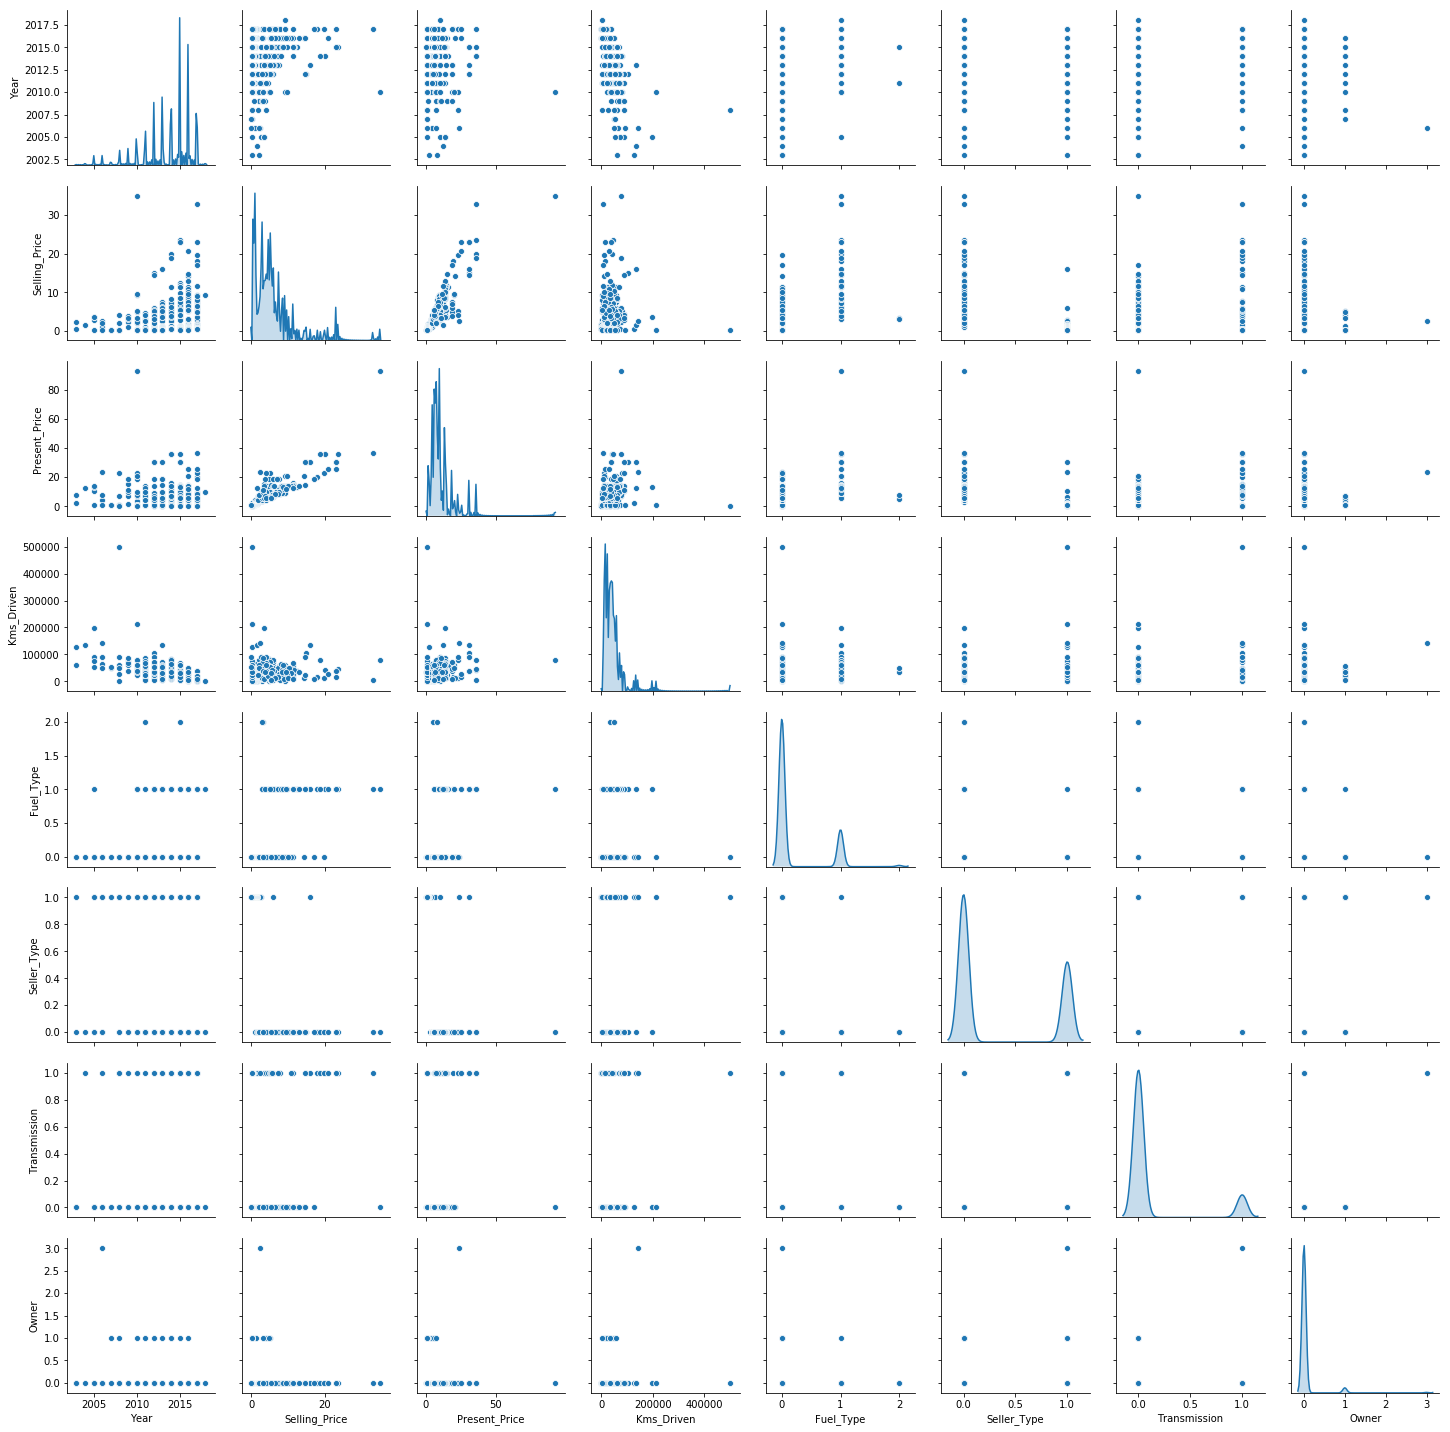

In [7]:
sns.pairplot(data,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

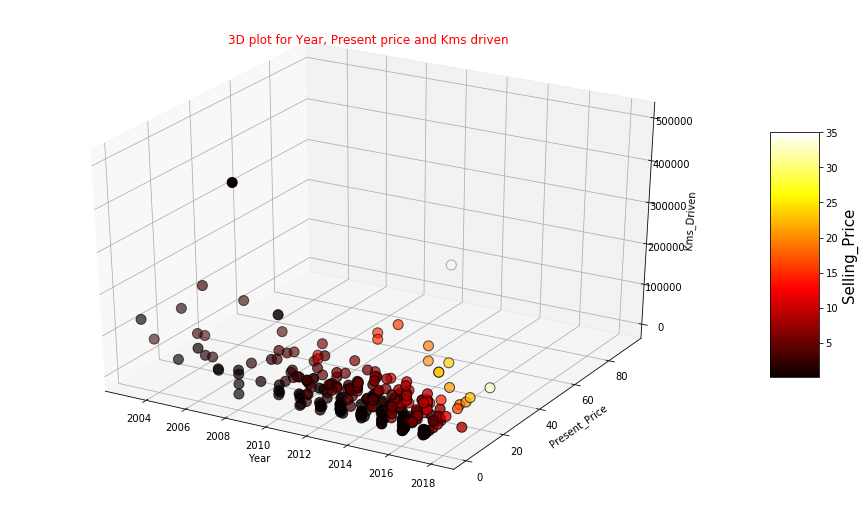

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(data["Year"],
           data["Present_Price"],
           data["Kms_Driven"],
           linewidth=1,edgecolor ="k",
           c=data["Selling_Price"],s=100,cmap="hot")

ax.set_xlabel("Year")
ax.set_ylabel("Present_Price")
ax.set_zlabel("Kms_Driven")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Selling_Price",fontsize = 15)

plt.title("3D plot for Year, Present price and Kms driven",color="red")
plt.show()

If we 3D plot critic features that effect selling price, we can see most of the cars accumulate around after 2010 year, low present price and low kms driven. Now its time to apply regression models.

<a id="4"></a> 
**4. Applying Regression Models**

Firstly lets separate Selling price from the data and drop unnecessary features.

In [9]:
y=data.Selling_Price
x=data.drop(["Selling_Price","Car_Name"],axis=1)

Spliting data to train and test sizes.

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 7)
x test:  (61, 7)
y train:  (240,)
y test:  (61,)


Secondly we are going to load libraries that we need calculate scores fo regression models. Than apply function which fit the models, get the scores and plot our predictions .

In [11]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [12]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

**1. Linear Regression**

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) 

r_2 score : 0.8484549412090155 

CV scores: [0.89746723 0.88756505 0.83007487 0.81438137 0.75880539] 

CV scores mean: 0.8376587811920091


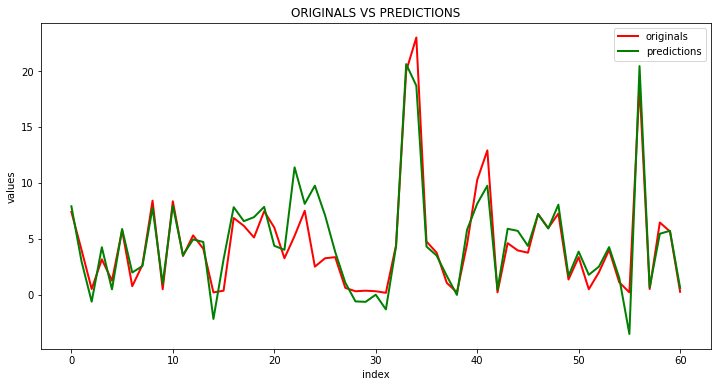

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test)

**2. Lasso **

Before applying Lasso model, I am going to assign a alpha range that effect model and choose the best estimator for model.   

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.8448893668196061
0.001


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 

r_2 score : 0.8526768677999489 

CV scores: [0.89716619 0.88736684 0.830188   0.81541598 0.76120855] 

CV scores mean: 0.8382691136251517


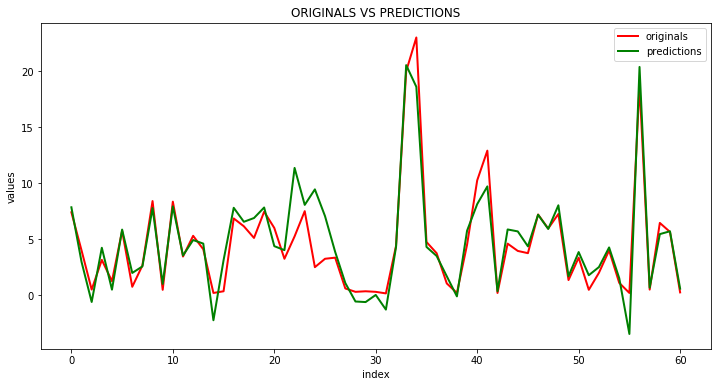

In [15]:
ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True) # applied the best estimator
model(ls,x_train,y_train,x_test,y_test)

**3. Ridge**

We are going to do same operation for Ridge

In [16]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(x_train, y_train)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

0.8451836594225124
0.001


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001) 

r_2 score : 0.8495567867442748 

CV scores: [0.89841767 0.88466039 0.82899042 0.81480488 0.77521494] 

CV scores mean: 0.8404176598072954


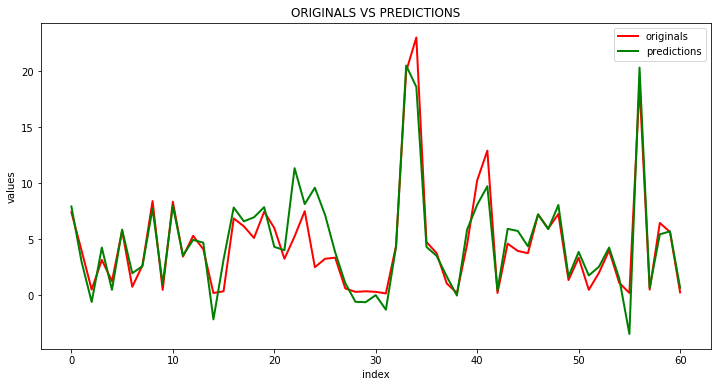

In [17]:
ridge = Ridge(alpha = 0.01, normalize = True) # applied the best estimator
model(ridge,x_train,y_train,x_test,y_test)

**4. Decision Tree Regressor**

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') 

r_2 score : 0.9641229638881157 

CV scores: [0.93253611 0.888638   0.90182964 0.91364486 0.70687399] 

CV scores mean: 0.8687045221531655


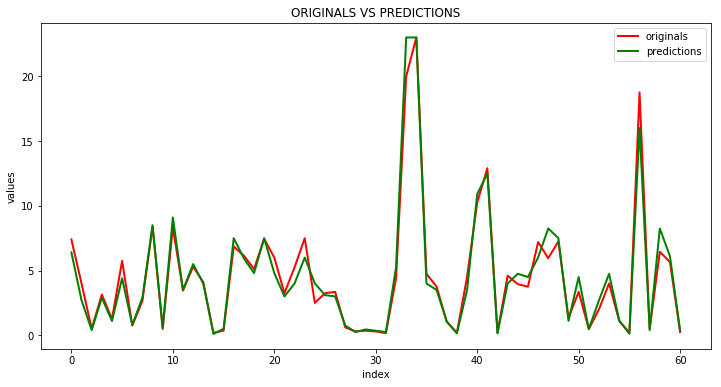

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,x_train,y_train,x_test,y_test)

**5. Random Forest Regressor**

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False) 

r_2 score : 0.9010356689515354 

CV scores: [0.93408048 0.9694762  0.85502122 0.9376604  0.72016603] 

CV scores mean: 0.8832808650586859


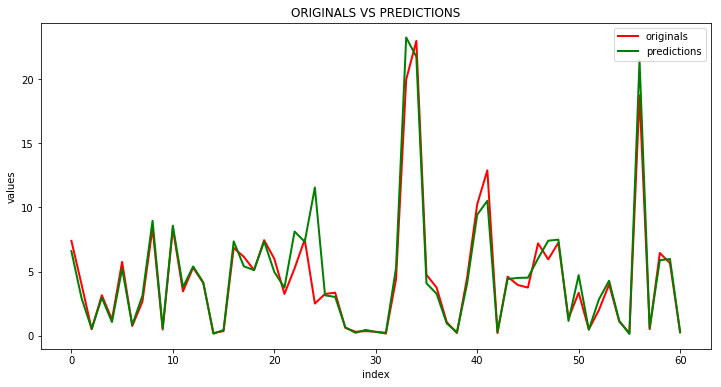

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(rf,x_train,y_train,x_test,y_test)

Lets see the results together in dataframe

In [20]:
Model = ["LinearRegression","Lasso","Ridge","DecisionTreeRegressor","RandomForestRegressor"]
results=pd.DataFrame({'Model': Model,'R Squared': r_2,'CV score mean': CV})
results

,Model,R Squared,CV score mean
0,LinearRegression,0.848455,0.837659
1,Lasso,0.852677,0.838269
2,Ridge,0.849557,0.840418
3,DecisionTreeRegressor,0.964123,0.868705
4,RandomForestRegressor,0.901036,0.883281


<a id="5"></a> 
**5. CONCLUSION**

We applied couple of regression models on dataset.  From the final dataframe, it gives opinion  about the score of models  and also the  plots help us to understand which models is more succesful.

* If you like it, thank you for you upvotes.
* If you have any question, I will happy to hear it

Also look for https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners for Machine Learning